In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [59]:
TARGET_CATEGORIES = [
    'Pozadavky',
    'Incidenty',
    'Pozadavky_na_HW',
    'Nastup_vystup_lidi',
    'Prava_SVN_Externi',
    'Prava_SVN_Interni',
    'Prava_EMail',
    'Prava_Bugzilla_Externi',
    'Prava_Bugzilla_Interni',
    'Prava_Bugzilla_Obchodni',
    'Prava_File_System',
    'Licence_SW',
    'Licence_SW trial',
    'Prava_Confluence',
    'Profis',
    'Prava_GIT',
    'Prava_Domena',
    'Sluzby_ITS',
    'Migrace',
]
len(TARGET_CATEGORIES)

19

In [39]:
def preprocess_data(df, target_categories):
    df = df.loc[:, ['name', 'short_desc', 'thetext']].dropna()
    df['name_aug'] = df['name'].apply(lambda n: 'Pozadavky' if n not in target_categories else n)
    df['full_text'] = (df['short_desc'] + '. ' + df['thetext'])
    target_enc = LabelEncoder().fit(target_categories)
    y = target_enc.transform(df['name_aug'].values.reshape((-1, 1))).ravel()
    df = df.loc[:, ['full_text']]
    return df, y

df, y_true = preprocess_data(pd.read_csv('/home/sfabo/Projects/klasifikace-bugu/zdroje/bugs_Profinit_ITS_full.csv', sep=';', encoding='cp1250'), TARGET_CATEGORIES)

/home/sfabo/.pyenv/versions/3.9.2/envs/dip/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/sfabo/.pyenv/versions/3.9.2/envs/dip/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
df['class'] = y_true

In [56]:
botzilla_form = 'data_botzilla/botzilla'
df.to_csv(f'{botzilla_form}_full.csv', index=False)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['full_text'], y_true, test_size=0.33, random_state=42)

In [58]:
pd.DataFrame({'text': X_train, 'label': y_train}).to_csv(f'{botzilla_form}_train.csv', index=False)
pd.DataFrame({'text': X_test, 'label': y_test}).to_csv(f'{botzilla_form}_test.csv', index=False)

## exploring data

(array([1.0494e+04, 3.1860e+03, 8.2900e+02, 3.0200e+02, 2.5700e+02,
        3.1400e+02, 4.4000e+01, 2.1700e+02, 2.4100e+02, 4.9000e+01,
        1.1000e+01, 7.0000e+00, 1.0000e+00, 3.0000e+00, 4.0000e+00,
        8.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.00

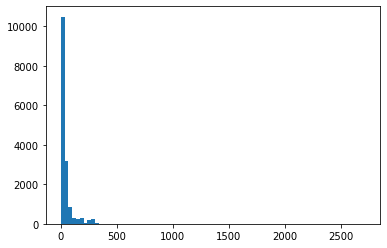

In [80]:
import matplotlib.pyplot as plt
plt.hist(df['full_text'].str.count(' ').sort_values(), bins=80)

In [35]:
df = pd.read_csv('/home/sfabo/Projects/klasifikace-bugu/zdroje/bugs_Profinit_ITS_full.csv', sep=';', encoding='cp1250')


In [36]:
df_clean = df.drop(columns=['bug_id', 'assigned_to', 'bug_file_loc', 'bug_severity', 'bug_status',
       'creation_ts', 'delta_ts', 'op_sys', 'priority', 'cf_last_date',
       'cf_approval_expiration_date', 'status_whiteboard',  'rep_platform', 'reporter', 
       'version', 'resolution', 'target_milestone', 'qa_contact', 'votes', 'lastdiffed',
       'everconfirmed', 'reporter_accessible', 'cclist_accessible',
       'estimated_time', 'remaining_time', 'deadline', 'cf_extended_info', 'product_id'])

KeyError: "['bug_id' 'assigned_to' 'bug_file_loc' 'bug_severity' 'bug_status'\n 'creation_ts' 'delta_ts' 'op_sys' 'priority' 'cf_last_date'\n 'cf_approval_expiration_date' 'status_whiteboard' 'rep_platform'\n 'reporter' 'version' 'resolution' 'target_milestone' 'qa_contact' 'votes'\n 'lastdiffed' 'everconfirmed' 'reporter_accessible' 'cclist_accessible'\n 'estimated_time' 'remaining_time' 'deadline' 'cf_extended_info'\n 'product_id'] not found in axis"

In [33]:
df_clean

short_desc  component_id  \
6826                        Windows tuhne a padá do BSOD         316.0   
14046                             Notebook Paščenko 5580         311.0   
615               Paysec - novy version a target INT BGZ         314.0   
13300                        Připojení pošty na notebook         314.0   
15136                                Přeinstalace Office         314.0   
...                                                  ...           ...   
1734   SMAZANO: VM-PCCS-N1 (hostname: vm-pccs-n1 / pe...         393.0   
1287                    CPoj_Blacklisty Bugzilla Externí         365.0   
9689                           hlučný větrák v notebooku         314.0   
4107                       Nefunguje RDP na vm-cssz-dev2         314.0   
4720         Prava na Exchange ActiveSync - novy telefon         378.0   

                                                 thetext  \
6826   Ahoj,\n\nasi od půli listopadu mám problémy s ...   
14046  Ahoj,\n   můj notebook je beznadějně starý a p...   
615    Prosim o zalozenie novych hodnot do version a ...   
13300  Prosím o povolení přístup do Exchange - z důvo...   
15136  Ahoj,\n\npo dohodě s Pavlem Kosinou prosím o p...   
...                                                  ...   
1734   hostname: VM-PCCS-N1\nIP: 172.16.200.48\nvCPU:...   
1287   Ahoj,\n\nprosím o přejmenování produktu CPoj_B...   
9689   Ahoj, myslím, že bych potřebovala vyměnit větr...   
4107   Nelze se připojit vzdálenou plochou na vm-cssz...   
4720   Ahoj,\n\nkoupil jsem si novy telefon a nema po...   

                         name  
6826                Incidenty  
14046         Pozadavky_na_HW  
615                 Pozadavky  
13300               Pozadavky  
15136               Pozadavky  
...                       ...  
1734               VM_Servers  
1287   Prava_Bugzilla_Externi  
9689                Pozadavky  
4107                Pozadavky  
4720              Prava_EMail  

[16434 rows x 4 columns]

In [28]:
new = df_clean.groupby('name').agg({'thetext': ['nunique', 'count']})
new.columns = ['nunique', 'count']
new.sort_values('count')

nunique  count
name                                        
Cloud4com                           1      1
Evidence - Nagios monitoring        1      1
Prava_CVS_Externi                   3      3
Prava_Sharepoint                    6      6
Stiznosti                           8      8
Rizeni_ITS                          8      8
Prava_Brain_Power                  11     11
Evidence - WWW/SFTP server         13     13
Prava_IRP                          13     13
Evidence - FTP/SFTP server         21     21
Evidence - Nexus repository        22     22
Administracni_denik                29     29
Pozadavky_na_SRV_HW                34     34
Prava_CRM                          36     36
Prava_Bugzilla_Obchodni            39     40
Prava_CVS_Interni                  59     59
Pripojeni_pocitace_do_LAN          60     60
Licence SW private                 68     70
Zlepsovaky                         75     75
Licence_SW trial                  134    138
Licence - archiv                  143    151
Prava_Bugzilla_Interni            164    164
Migrace                           123    165
Sluzby_ITS                        193    193
Prava_Domena                      201    206
Prava_SVN_Interni                 315    317
VM_Servers                        381    382
Prava_GIT                         492    493
Profis                            535    537
Prava_Confluence                  567    574
Licence_SW                        606    610
Prava_File_System                 634    637
Prava_Bugzilla_Externi            664    666
Incidenty                         711    713
Prava_EMail                       766    773
Prava_SVN_Externi                 837    841
Nastup_vystup_lidi                984    985
Pozadavky_na_HW                  1264   1270
Pozadavky                        5642   5670

In [29]:
df['name_aug'] = df['name'].apply(lambda n: 'Pozadavky' if n not in TARGET_CATEGORIES else n)

In [30]:
df_clean = df_clean.sample(frac=1)


In [32]:
df.groupby('name_aug').count().sort_values('thetext')

bug_id  assigned_to  bug_file_loc  bug_severity  \
name_aug                                                                   
Prava_Bugzilla_Obchodni      40           40             0            40   
Licence_SW trial            138          138             1           138   
Prava_Bugzilla_Interni      164          164             0           164   
Migrace                     165          165             0           165   
Sluzby_ITS                  198          198             1           198   
Prava_Domena                211          211             2           211   
Prava_SVN_Interni           319          319             0           319   
Prava_GIT                   499          499             1           499   
Profis                      540          540            24           540   
Prava_Confluence            577          577             3           577   
Licence_SW                  618          618             1           618   
Prava_File_System           645          645             0           645   
Prava_Bugzilla_Externi      670          670             1           670   
Incidenty                   715          715             1           715   
Prava_EMail                 791          791             1           791   
Prava_SVN_Externi           845          845             2           845   
Nastup_vystup_lidi          995          995             0           995   
Pozadavky_na_HW            1313         1313             0          1313   
Pozadavky                  6988         6877            40          6875   

                         bug_status  creation_ts  delta_ts  short_desc  \
name_aug                                                                 
Prava_Bugzilla_Obchodni          40           40        40          40   
Licence_SW trial                138          138       138         138   
Prava_Bugzilla_Interni          164          164       164         164   
Migrace                         165          165       165         165   
Sluzby_ITS                      198          198       198         198   
Prava_Domena                    211          211       211         211   
Prava_SVN_Interni               319          319       319         319   
Prava_GIT                       499          499       499         499   
Profis                          540          540       540         540   
Prava_Confluence                577          577       577         577   
Licence_SW                      618          618       618         618   
Prava_File_System               645          645       645         645   
Prava_Bugzilla_Externi          670          670       670         670   
Incidenty                       715          715       715         715   
Prava_EMail                     791          791       791         791   
Prava_SVN_Externi               845          845       845         845   
Nastup_vystup_lidi              995          995       995         995   
Pozadavky_na_HW                1313         1313      1313        1313   
Pozadavky                      6875         6875      6875        6875   

                         op_sys  priority  ...  estimated_time  \
name_aug                                   ...                   
Prava_Bugzilla_Obchodni      40        40  ...              40   
Licence_SW trial            138       138  ...             138   
Prava_Bugzilla_Interni      164       164  ...             164   
Migrace                     165       165  ...             165   
Sluzby_ITS                  198       198  ...             198   
Prava_Domena                211       211  ...             211   
Prava_SVN_Interni           319       319  ...             319   
Prava_GIT                   499       499  ...             499   
Profis                      540       540  ...             540   
Prava_Confluence            577       577  ...             577   
Licence_SW                  618       618  ...             618   
Prava_File_Syst

In [9]:
from sklearn.model_selection import train_test_split
import fasttext
from intent_detector.nb_query_eval import Tokenizer

with open(str('intent_detector/nb_query_eval/resources/stopwords.txt')) as f:
    sw = [line.strip() for line in f.readlines()]
tkzr = Tokenizer(sw)

ft = fasttext.load_model('cc.cs.300.bin')

In [10]:
df_clean.isna().sum()

short_desc      116
component_id    116
thetext         437
name            118
name_aug          0
dtype: int64

In [13]:
def words_only(x, tokenizer):
    tks = tokenizer.fit(x)
    return [p[0] for p in tks if p[1] == 'KW']

In [18]:
col_text_name, col_class_name = 'thetext', 'name_aug'

df = df_clean[df_clean[col_text_name].notna()]
df['words_list'] = df[col_text_name].apply(str).apply(words_only, tokenizer=tkzr)
df_prep = df.explode('words_list')

df_prep

/tmp/ipykernel_676/3985770233.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words_list'] = df[col_text_name].apply(str).apply(words_only, tokenizer=tkzr)


short_desc  component_id  \
137   Zvetseni RAM         314.0   
137   Zvetseni RAM         314.0   
137   Zvetseni RAM         314.0   
137   Zvetseni RAM         314.0   
137   Zvetseni RAM         314.0   
...            ...           ...   
2353   VM-ING-IDQ2         393.0   
2353   VM-ING-IDQ2         393.0   
2353   VM-ING-IDQ2         393.0   
2353   VM-ING-IDQ2         393.0   
2353   VM-ING-IDQ2         393.0   

                                                thetext        name  \
137   Pavle T.,\n\ndle nasi domluvy zakladam pozadav...   Pozadavky   
137   Pavle T.,\n\ndle nasi domluvy zakladam pozadav...   Pozadavky   
137   Pavle T.,\n\ndle nasi domluvy zakladam pozadav...   Pozadavky   
137   Pavle T.,\n\ndle nasi domluvy zakladam pozadav...   Pozadavky   
137   Pavle T.,\n\ndle nasi domluvy zakladam pozadav...   Pozadavky   
...                                                 ...         ...   
2353  Ahoj, potrebujem co nejdriv sprovoznit instala...  VM_Servers   
2353  Ahoj, potrebujem co nejdriv sprovoznit instala...  VM_Servers   
2353  Ahoj, potrebujem co nejdriv sprovoznit instala...  VM_Servers   
2353  Ahoj, potrebujem co nejdriv sprovoznit instala...  VM_Servers   
2353  Ahoj, potrebujem co nejdriv sprovoznit instala...  VM_Servers   

       name_aug words_list  
137   Pozadavky      pavle  
137   Pozadavky        dle  
137   Pozadavky       nasi  
137   Pozadavky    domluvy  
137   Pozadavky   zakladam  
...         ...        ...  
2353  Pozadavky       vhdd  
2353  Pozadavky         gb  
2353  Pozadavky         os  
2353  Pozadavky    windows  
2353  Pozadavky     server  

[432224 rows x 6 columns]

In [21]:




# df_clean['words_list'] = df_clean[col_text_name].apply(str).apply(words_only, tokenizer=tkzr)
# df_clean[col_text_name + '_emb'] = df_clean['words_list'].apply(lambda x: ft.get_sentence_vector(' '.join(x)))

df = df_clean[df_clean[col_text_name].notna()]
df['words_list'] = df[col_text_name].apply(str).apply(words_only, tokenizer=tkzr)
# df_prep = df.explode('words_list')

df_prep

df_prep['word_emb'] = df_prep['words_list'].apply(ft.get_sentence_vector)
# X_train = df_prep['word_emb']
# y_train = df_prep[col_class_name]

# df_test = ctx.obj['test']
# df_test['words_list'] = df_test[col_text_name].apply(words_only, tokenizer=tkzr)


X_train, X_test, y_train, y_test = train_test_split(df_clean[col_text_name + '_emb'], df_clean['name_aug'], test_size=0.2, random_state=42)

In [16]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf.fit(X_train.tolist(), y_train)

NameError: name 'X_train' is not defined

In [ ]:
# y_pred = clf.predict_proba(X_test.tolist())
y_pred = []
    for row in df_test.iterrows():
        y_proba_one = clf.predict_proba(
            [ft.get_word_vector(word) for word in row[1]['words_list']])
        y_pred.append(y_proba_one.mean(axis=0).tolist())
    y_test = df_test[col_class_name]

In [17]:
def test_statistics(y_test, y_pred, labels):
    from sklearn import preprocessing
    import sklearn.metrics as mets
    import numpy as np

    lb = preprocessing.LabelBinarizer()
    y_test_b = lb.fit_transform(y_test)

    roc_auc = mets.roc_auc_score(y_test_b, y_pred)
    acc_3 = mets.top_k_accuracy_score(y_test, y_pred, k=3, normalize=True, labels=labels)
    acc = mets.top_k_accuracy_score(y_test, y_pred, k=1, normalize=True, labels=labels)

    y_pred_labels = [labels[pred] for pred in np.argmax(y_pred, axis=1)]
    clf_report = mets.classification_report(y_test, y_pred_labels)
    lines = ['\t' + l for l in clf_report.split('\n')]
    clf_report = '\n'.join(lines)

    return dict(
        roc_auc=roc_auc,
        accuracy_top_3=acc_3,
        accuracy=acc,
        classification_report=clf_report,
    )

stats = test_statistics(y_test, y_pred, clf.classes_)
print(stats)
print(stats['classification_report'])

NameError: name 'y_test' is not defined